In [2]:
from gensim.models import Word2Vec
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [3]:
eu_countries = [
  "Albanien",
  "Andorra",
  "Armenien",
  "Österreich",
  "Aserbaidschan",
  "Weißrussland",
  "Belgien",
  "Bulgarien",
  "Kroatien",
  "Tschechien",
  "Dänemark",
  "Estland",
  "Finnland",
  "Frankreich",
  "Deutschland",
  "Griechenland",
  "Ungarn",
  "Island",
  "Italien",
  "Kasachstan",
  "Lettland",
  "Liechtenstein",
  "Litauen",
  "Luxemburg",
  "Malta",
  "Moldawien",
  "Monaco",
  "Montenegro",
  "Niederlande",
  "Norwegen",
  "Polen",
  "Portugal",
  "Rumänien",
  "Russland",
  "Serbien",
  "Slowakei",
  "Slowenien",
  "Spanien",
  "Schweden",
  "Schweiz",
  "Türkei",
  "Ukraine",
  "Georgien",
  "Irland",
  "Vatikanstadt",
  "Mazedonien",
  "Kosovo"
]

In [4]:
model = Word2Vec.load('models/presentation-model-300.model')

In [5]:
eu_vectors = [model[country] for country in eu_countries]

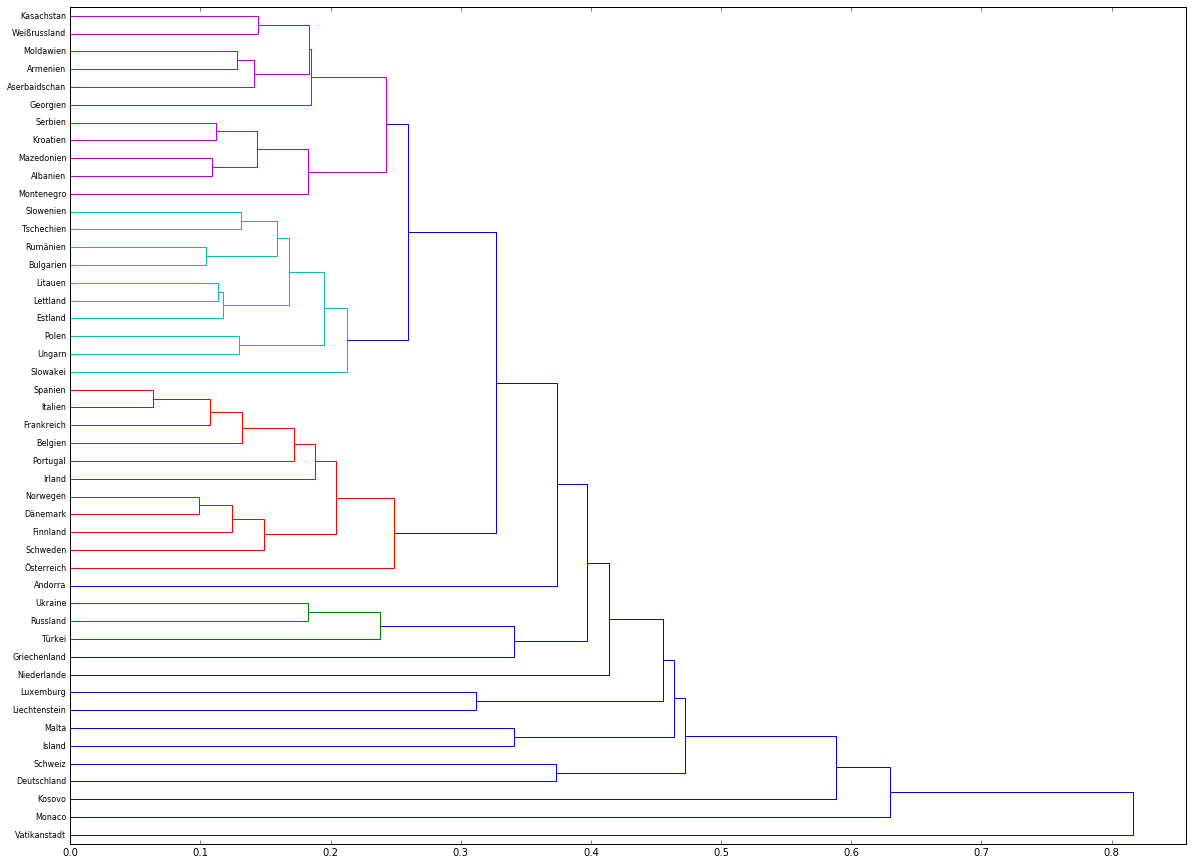

In [6]:
Z = hierarchy.linkage(eu_vectors, 'average', 'cosine')
plt.figure(figsize=(20, 15))
dn = hierarchy.dendrogram(Z, labels=eu_countries, orientation='right', color_threshold=0.25)
plt.show()

In [34]:
countries = [
    'USA',
    'Deutschland',
    'Frankreich',
    'Russland',
    'Großbritannien',
    'Türkei'
]
heads = [
    'Obama',
    'Merkel',
    'Hollande',
    'Putin',
    'Cameron',
    'Erdogan'
]

country_head = [p[0] + ' ' + p[1] for p in zip(countries, heads)]

country_vectors = [model[w] for w in countries]
heads_vectors = [model[w] for w in heads]
rel_vectors = [model[p[0]] - model[p[1]] for p in zip(heads, countries)]

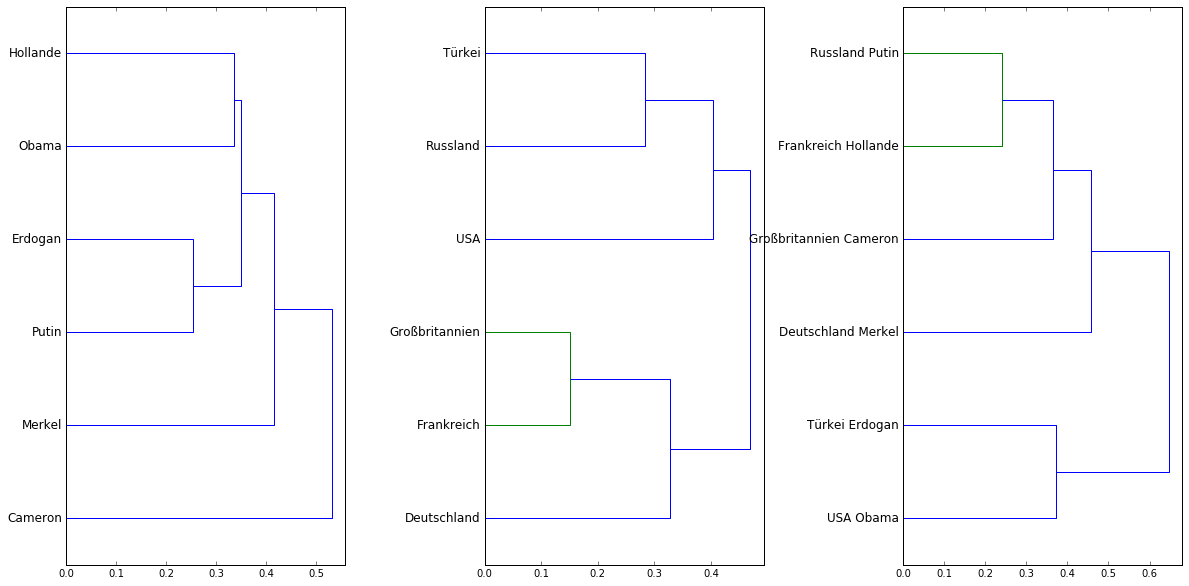

In [57]:
method = 'complete'
Z_rel = hierarchy.linkage(rel_vectors, method, 'cosine')
Z_heads = hierarchy.linkage(heads_vectors, method, 'cosine')
Z_countries = hierarchy.linkage(country_vectors, method, 'cosine')

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
plt.subplots_adjust(wspace=0.5)
dn = hierarchy.dendrogram(Z_heads, ax=axes[0], labels=heads, orientation='right', color_threshold=0.25)
dn = hierarchy.dendrogram(Z_countries, ax=axes[1], labels=countries, orientation='right', color_threshold=0.25)
dn = hierarchy.dendrogram(Z_rel, ax=axes[2], labels=country_head, orientation='right', color_threshold=0.25)
plt.show()

In [47]:
verbs = [
  'läufst',
  'läuft',
  'laufen',
  'lauft',
  'lief',
  'liefen',
  'laufe',
  'liefe',
  'laufend',
  'gelaufen'
]

verb_vectors = [model[w] for w in verbs]

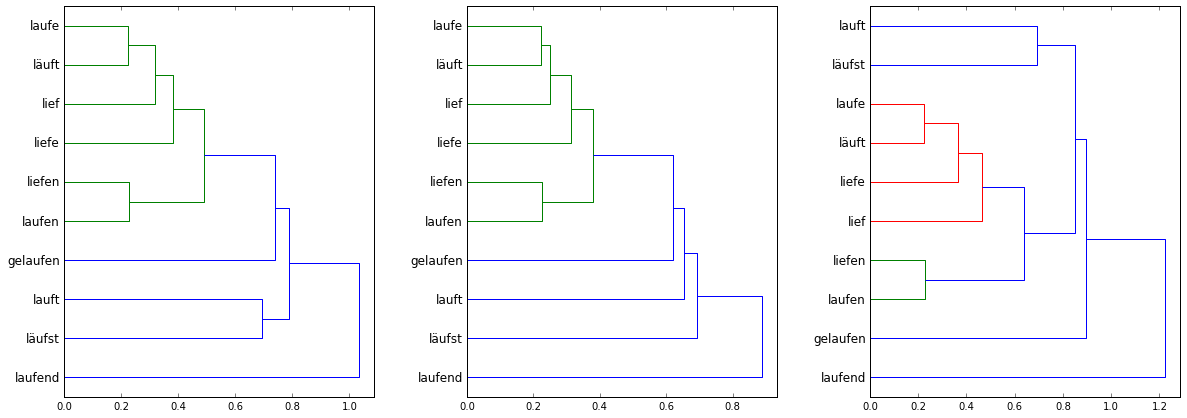

In [56]:
Z1 = hierarchy.linkage(verb_vectors, 'average', 'cosine')
Z2 = hierarchy.linkage(verb_vectors, 'single', 'cosine')
Z3 = hierarchy.linkage(verb_vectors, 'complete', 'cosine')

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
plt.subplots_adjust(wspace=0.3)
dn1 = hierarchy.dendrogram(Z1, ax=axes[0], labels=verbs, orientation='right', color_threshold=0.6)
dn2 = hierarchy.dendrogram(Z2, ax=axes[1], labels=verbs, orientation='right', color_threshold=0.6)
dn3 = hierarchy.dendrogram(Z3, ax=axes[2], labels=verbs, orientation='right', color_threshold=0.6)
plt.show()